##### data

In [ ]:
from datetime import datetime
import requests

data = []

while True:
    a = datetime.now().second
    if (a % 10) == 0:  # every 10 seconds
        x = requests.get('http://api.open-notify.org/iss-now.json') 
        data.append(x.json()) # ---- To do something every 10 seconds ---- #
        while True:  # discard any milliseconds or duplicated 10 seconds
            a = datetime.now().second
            if (a % 10) != 0:
                break

    if len(data) == 100:
        break

data

##### numpy and pandas

In [ ]:
import pandas as pd
import numpy as np

listdf = pd.DataFrame(data)
listdf

In [ ]:
latitude = [d.get('latitude') for d in listdf["iss_position"]]
listdf["latitude"]=latitude

longitude = [d.get('longitude') for d in listdf["iss_position"]]
listdf["longitude"]=longitude

listdf.drop(columns=['iss_position'], axis=1, inplace=True)

listdf

##### csv file

In [ ]:
import csv

listdf.to_csv(r'/Users/dianneprado/github-repo/for-itm/module 5/iss-info.csv', index=False)

##### open csv file

In [1]:
import pandas as pd

filename = 'iss-info.csv'
df = pd.read_csv(filename)

##### map visualization

In [2]:
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

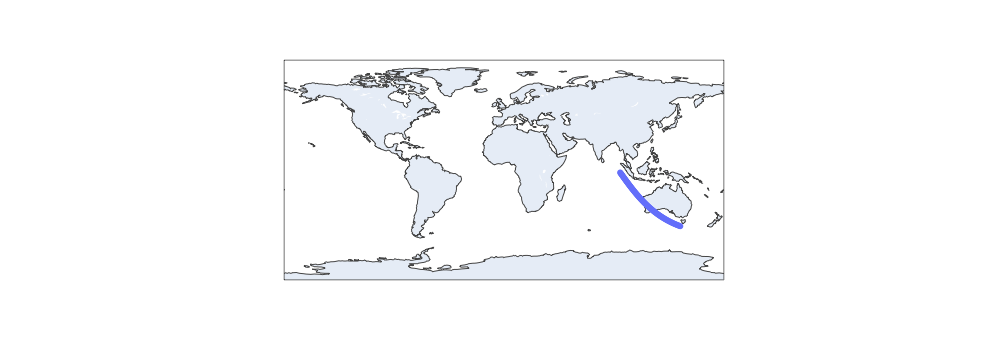

In [3]:
fig = px.scatter_geo(df, lat = 'latitude',
                    lon = 'longitude')

fig.show()

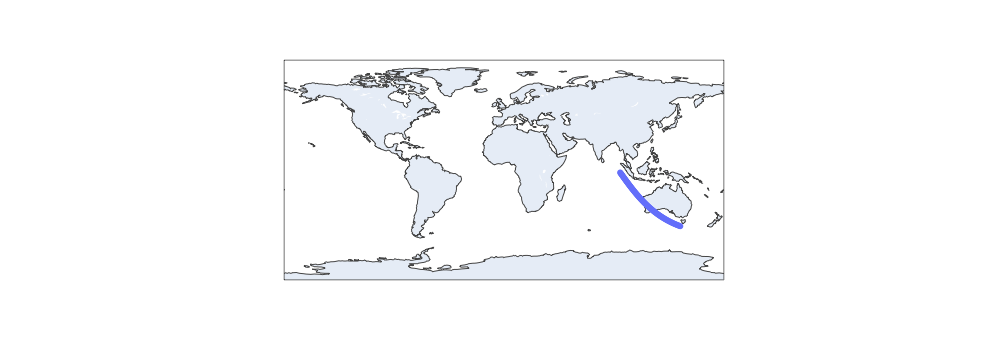

##### matplotlib

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as FuncAnimation

%matplotlib inline

In [5]:
lati = df.loc[:,"latitude"]
longi = df.loc[:,"longitude"]

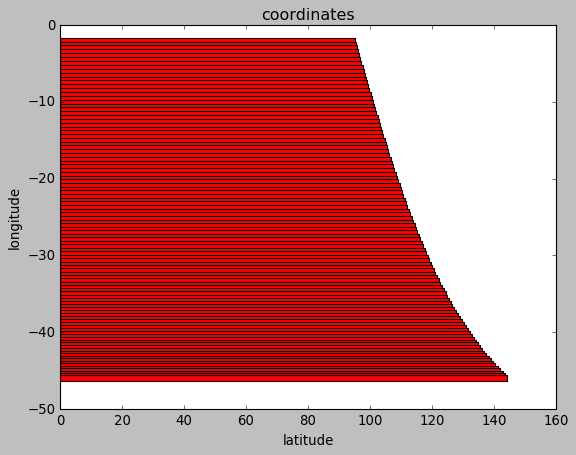

In [6]:
plt.style.use('classic')
plt.barh(y=lati, width=longi, color='r')
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("coordinates")
plt.show()

Text(0.5, 1.0, 'coord')

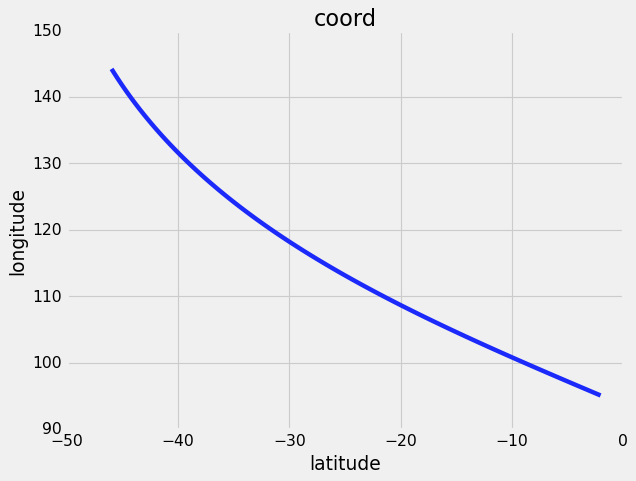

In [7]:
plt.style.use('fivethirtyeight')
plt.plot(lati, longi,  color='#1B29FA')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('coord')


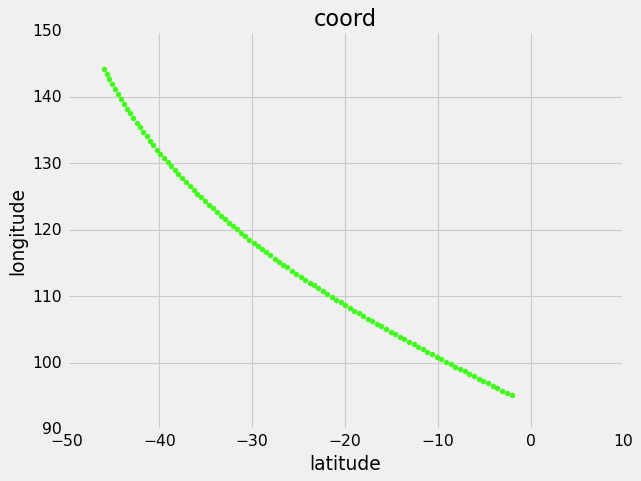

In [8]:
plt.style.use('seaborn-dark-palette')
plt.scatter(lati,longi, color='#40FA1B')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('coord')
plt.show()


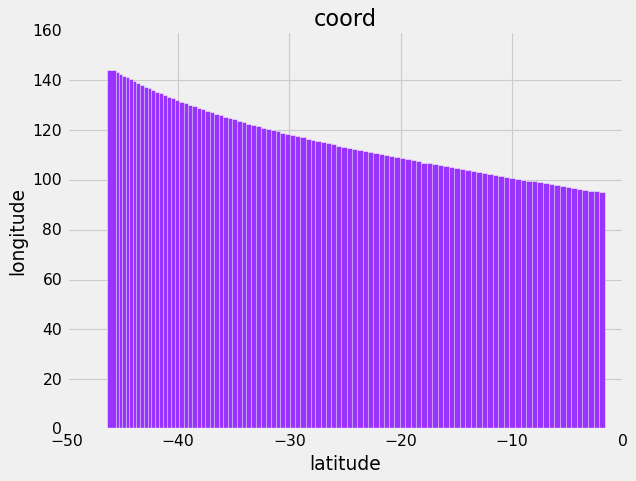

In [9]:
plt.style.use('seaborn-colorblind')
plt.bar(lati,longi,  color='#9933FF')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('coord')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

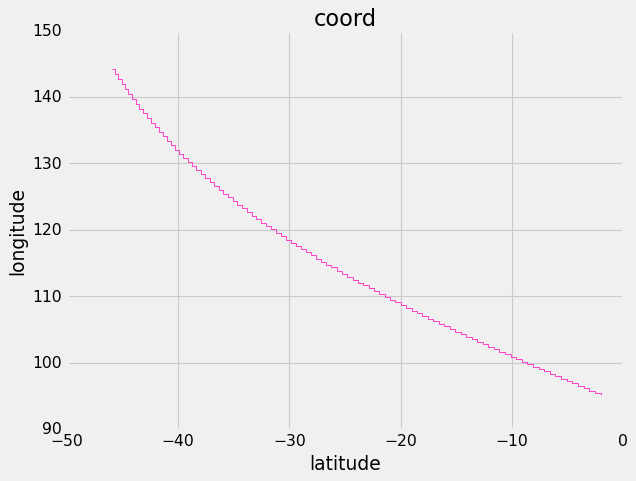

In [10]:
plt.style.use('seaborn-colorblind')
plt.step(lati, longi, color='#FF33C4', linewidth=0.8)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('coord')
plt.show